# 0.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("fraudTest.csv")

In [3]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [4]:
df_select = df[["trans_date_trans_time", "category", "amt", "city_pop", "is_fraud"]]

df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]

X = pd.get_dummies(df_select, ["category"]).drop(["trans_date_trans_time", "is_fraud"], axis = 1)
y = df["is_fraud"]

/var/folders/jk/76wv01tj2_s1d7lbkvfn6_680000gn/T/ipykernel_45436/2282180580.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"] = pd.to_datetime(df_select["trans_date_trans_time"])
/var/folders/jk/76wv01tj2_s1d7lbkvfn6_680000gn/T/ipykernel_45436/2282180580.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"] = [i.second for i in df_select["trans_date_trans_time"]]


In [5]:
y

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

# 1.) Use scikit learn preprocessing to split the data into 70/30 in out of sample

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)
# total number of fraud in training samples
# sum(y_train == 1)

In [8]:
X_test, X_holdout, y_test, y_holdout = train_test_split(X_test, y_test, test_size = .5)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_holdout = scaler.transform(X_holdout)

# 2.) Make three sets of training data (Oversample, Undersample and SMOTE)

In [10]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [11]:
# add random_state to make result continuous

ros = RandomOverSampler(random_state=42)
over_X, over_y = ros.fit_resample(X_train, y_train)


rus = RandomUnderSampler(random_state=42)
under_X, under_y = rus.fit_resample(X_train, y_train)

# oversampling the data until we have same data size for majority and minority classes
smote = SMOTE(random_state=42)
smote_X, smote_y = smote.fit_resample(X_train, y_train)

In [12]:
# oversampling the minory class to maech the number of majority class
print(sum(y_train == 0))
print(len(over_y))
print(len(smote_y))

387486
774972
774972


In [13]:
# undersample the majority class to match the number of the minority class
print(sum(y_train == 1))
print(len(under_y))

1517
3034


# 3.) Train three logistic regression models

In [14]:
from sklearn.linear_model import LogisticRegression

In [15]:
over_log = LogisticRegression().fit(over_X, over_y)

under_log = LogisticRegression().fit(under_X, under_y)

smote_log = LogisticRegression().fit(smote_X, smote_y)

# 4.) Test the three models

In [16]:
over_log.score(X_test, y_test)

0.9241104633028624

In [17]:
under_log.score(X_test, y_test)

0.9157249454161568

In [18]:
smote_log.score(X_test, y_test)

0.921387269368267

# 5.) Which performed best in Out of Sample metrics?

In [19]:
# Sensitivity here in credit fraud is more important as seen from last class

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
y_true = y_test

In [22]:
y_pred = over_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76813,  6241],
       [   85,   219]])

In [23]:
print("Over Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Over Sample Sensitivity :  0.7203947368421053


In [24]:
y_pred = under_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76113,  6941],
       [   84,   220]])

In [25]:
print("Under Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

Under Sample Sensitivity :  0.7236842105263158


In [26]:
y_pred = smote_log.predict(X_test)
cm = confusion_matrix(y_true, y_pred)
cm

array([[76585,  6469],
       [   84,   220]])

In [27]:
print("SMOTE Sample Sensitivity : ", cm[1,1] /( cm[1,0] + cm[1,1]))

SMOTE Sample Sensitivity :  0.7236842105263158


# 6.) Pick two features and plot the two classes before and after SMOTE.

In [28]:
raw_temp = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], axis =1)

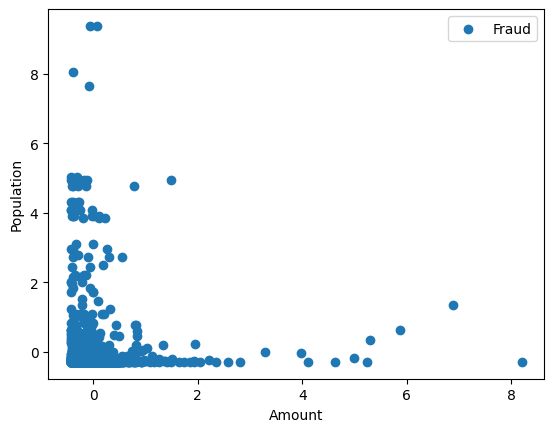

In [29]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1].iloc[:, 0:1], raw_temp[raw_temp["is_fraud"] == 1].iloc[:, 1:2])
plt.legend(["Fraud", "Not Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

In [30]:
raw_temp = pd.concat([pd.DataFrame(smote_X), pd.DataFrame(smote_y)], axis =1)

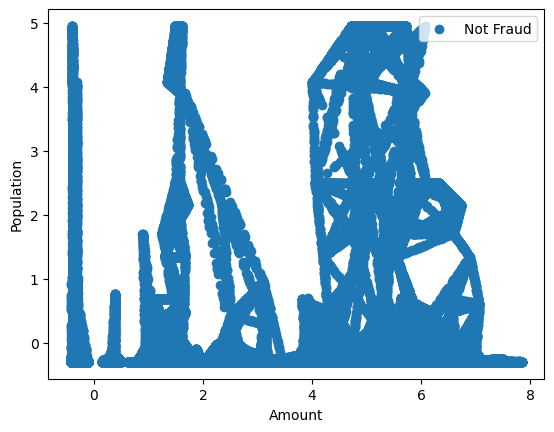

In [31]:
#plt.scatter(raw_temp[raw_temp["is_fraud"] == 0]["amt"], raw_temp[raw_temp["is_fraud"] == 0]["city_pop"])

plt.scatter(raw_temp[raw_temp["is_fraud"] == 1].iloc[:,0:1], raw_temp[raw_temp["is_fraud"] == 1].iloc[:,1:2])
plt.legend([ "Not Fraud", "Fraud"])
plt.xlabel("Amount")
plt.ylabel("Population")

plt.show()

# 7.) We want to compare oversampling, Undersampling and SMOTE across our 3 models (Logistic Regression, Logistic Regression Lasso and Decision Trees).

# Make a dataframe that has a dual index and 9 Rows.
# Calculate: Sensitivity, Specificity, Precision, Recall and F1 score. for out of sample data.
# Notice any patterns across perfomance for this model. Does one totally out perform the others IE. over/under/smote or does a model perform better DT, Lasso, LR?
# Choose what you think is the best model and why. test on Holdout

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import pandas as pd

In [33]:
resampling_methods = {
    'over': RandomOverSampler(),
    'under': RandomUnderSampler(),
    'sote': SMOTE(),
}

model_configs = {
    'LOG': LogisticRegression(),
    'LASSO': LogisticRegression(penalty='l1', C=2., solver='liblinear'),
    'DTREE': DecisionTreeClassifier(),
}

In [34]:
def calc_perf_metric(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return(sensitivity, specificity, precision, recall, f1)

In [35]:
trained_models = {}
results = []

for resample_key, resampler in resampling_methods.items():
    resample_X, resample_y = resampler.fit_resample(X_train, y_train)
    
    for model_key, model in model_configs.items():
        combined_key = f"{resample_key}_{model_key}"
        
        m = model.fit(resample_X, resample_y)
        trained_models[combined_key] = m
        
        y_pred = m.predict(X_test)
        
        sensitivity, specificity, precision, recall, f1 = calc_perf_metric(y_test, y_pred)
        
        results.append({'Model': combined_key, 
                       'Sensitivity': sensitivity,
                       'Specificity': specificity,
                       'Precision': precision,
                       'Recall': recall,
                       'F1': f1})

In [36]:
result_df = pd.DataFrame(results)
result_df

,Model,Sensitivity,Specificity,Precision,Recall,F1
0,over_LOG,0.723684,0.925711,0.034429,0.723684,0.065731
1,over_LASSO,0.723684,0.925735,0.034440,0.723684,0.065750
2,over_DTREE,0.578947,0.998531,0.590604,0.578947,0.584718
3,under_LOG,0.723684,0.931490,0.037225,0.723684,0.070808
4,under_LASSO,0.723684,0.931213,0.037081,0.723684,0.070547
5,under_DTREE,0.950658,0.943374,0.057893,0.950658,0.109139
6,sote_LOG,0.723684,0.922869,0.033203,0.723684,0.063492
7,sote_LASSO,0.723684,0.922869,0.033203,0.723684,0.063492
8,sote_DTREE,0.713816,0.992523,0.258950,0.713816,0.380035
